Gene Model Summariser - Results Explorer
✓ Found results: /Users/macbookpro2020/Sites/GroupF_GFFParser/results

  ✓ transcript_summary.tsv
  ✓ run.json

📊 Loading data...
✓ Loaded 3 transcripts
✓ From: /data/models.gff3
✓ Date: 2026-01-27T23:03:28.375841

DATA PREVIEW


,gene_id,transcript_id,n_exons,has_cds,flags,is_flagged,n_flags
0,PF3D7_1314600,PF3D7_1314600.1,1,True,"cds_phase_inconsistent,missing_start_codon,mis...",True,4
1,gene1,tx1,3,True,"cds_phase_inconsistent,missing_stop_codon",True,2
2,gene1,tx2,2,False,no_cds,True,1



 gene_id            str
transcript_id      str
n_exons          int64
has_cds           bool
flags              str
is_flagged        bool
n_flags          int64
dtype: object

        n_exons   n_flags
count      3.0  3.000000
mean       2.0  2.333333
std        1.0  1.527525
min        1.0  1.000000
25%        1.5  1.500000
50%        2.0  2.000000
75%        2.5  3.000000
max        3.0  4.000000

SUMMARY STATISTICS
Total Transcripts                  3 (100.0%)
Unique Genes                       2 ( 66.7%)
Flagged                            3 (100.0%)
With CDS                           2 ( 66.7%)
Without CDS                        1 ( 33.3%)

Exon Statistics:
  Mean:   2.00
  Median: 2
  Range:  1 - 3


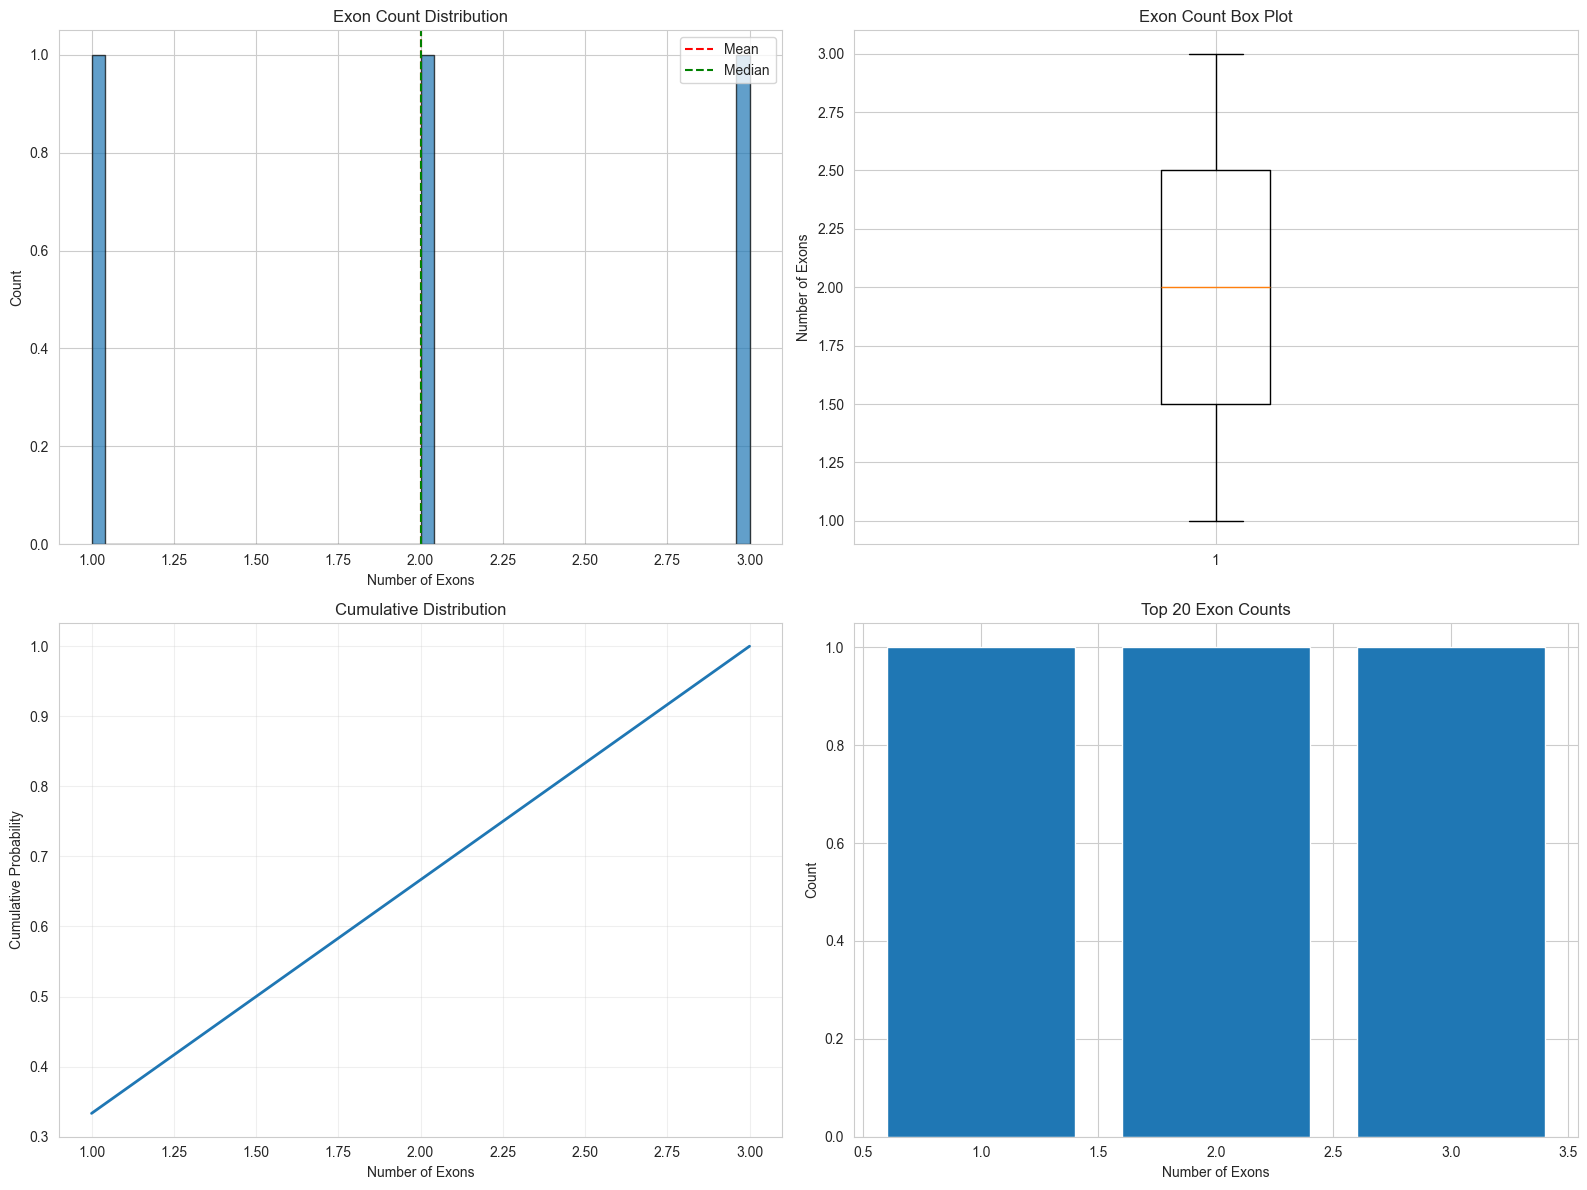

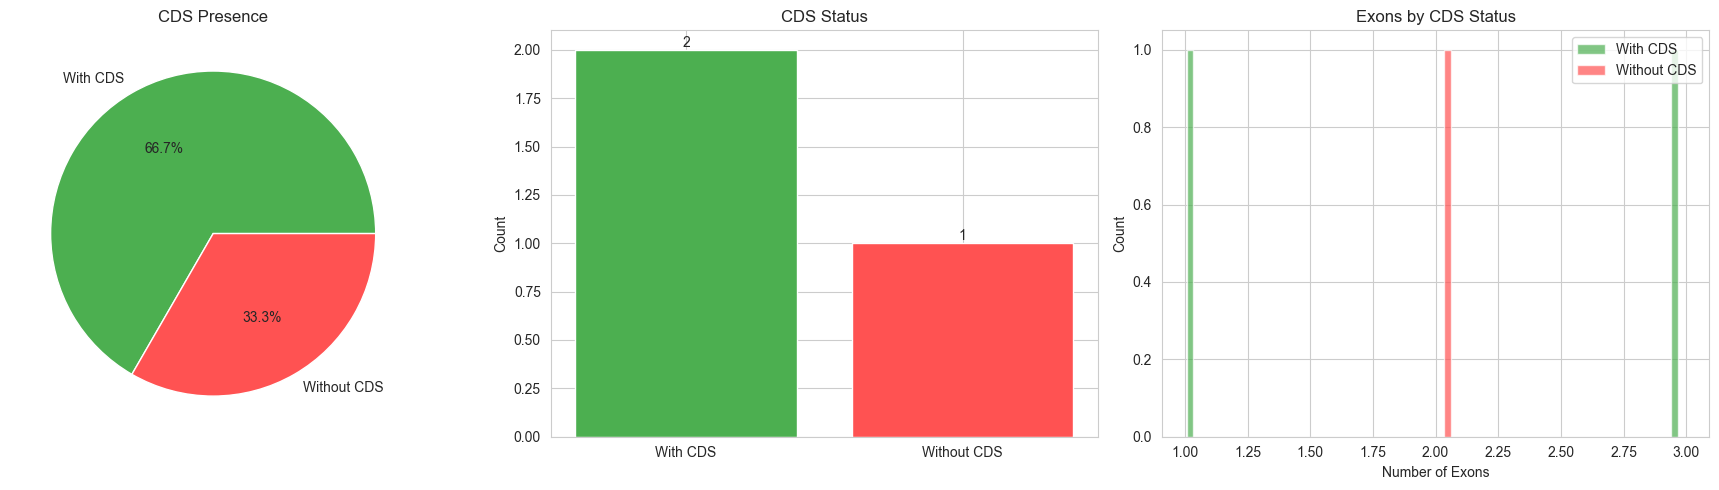

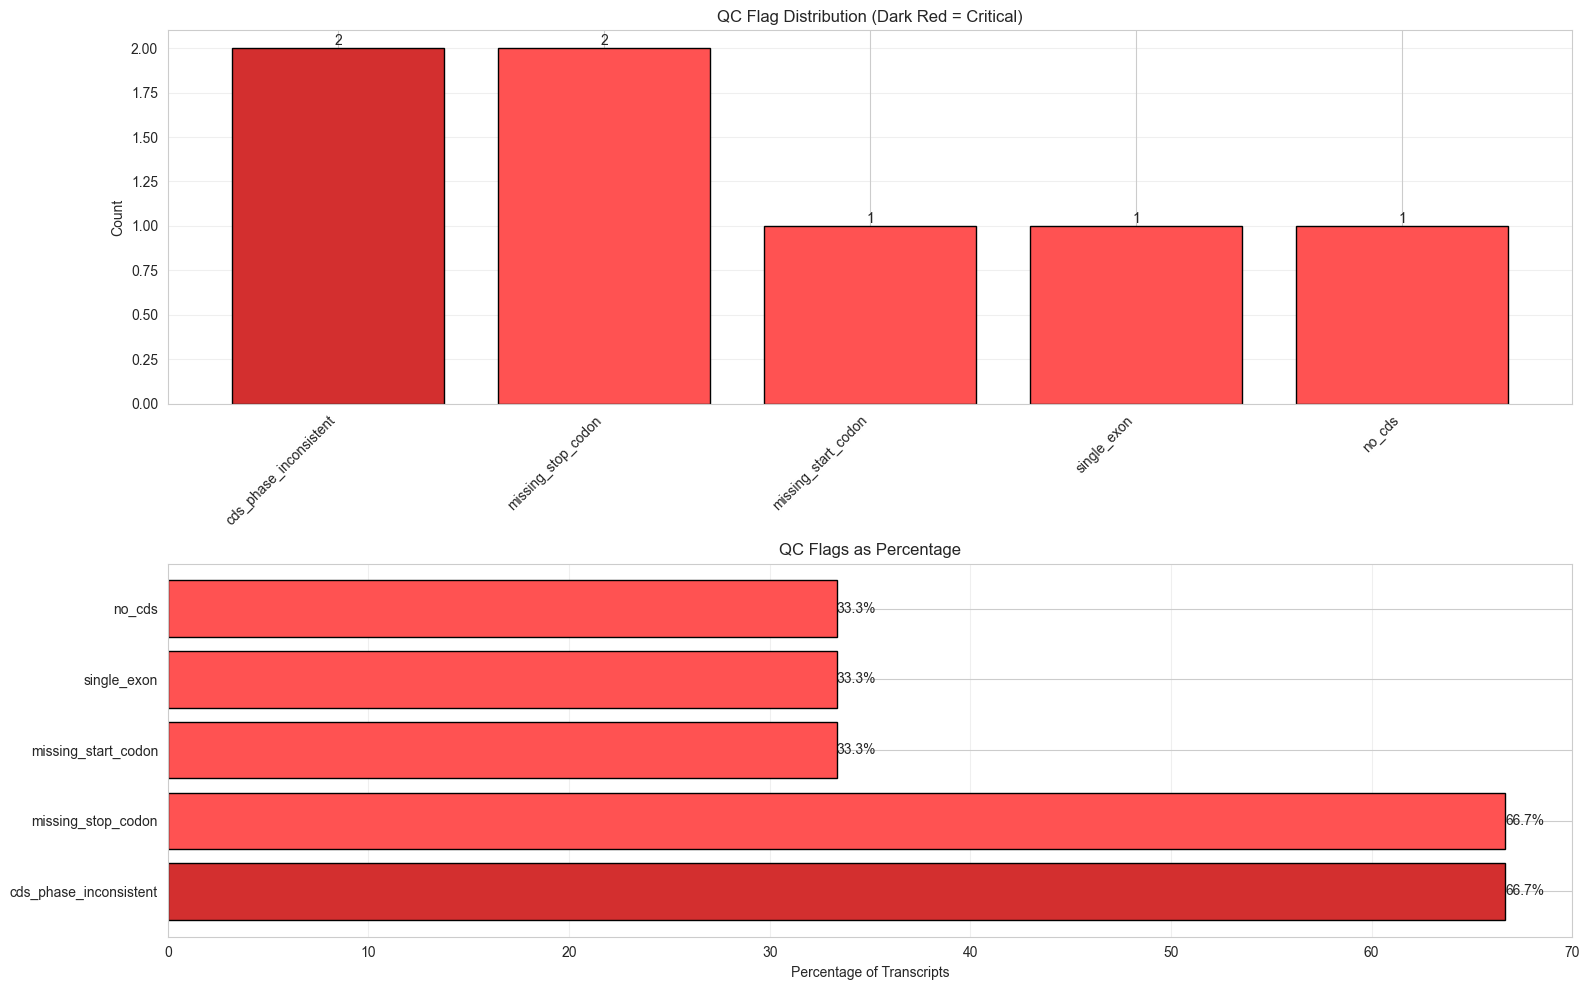


QC Flag Summary:
Flag                                     Count        % Severity
----------------------------------------------------------------------
cds_phase_inconsistent                       2    66.7% 🔴 CRITICAL
missing_stop_codon                           2    66.7% ⚠️  Warning
missing_start_codon                          1    33.3% ⚠️  Warning
single_exon                                  1    33.3% ⚠️  Warning
no_cds                                       1    33.3% ⚠️  Warning


/var/folders/w8/tkfttgj54b57y5l4tbj9rrrm0000gn/T/ipykernel_56045/1380261838.py:232: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[0, 0].boxplot(flagged_data, labels=['Flagged', 'Not Flagged'], patch_artist=True)


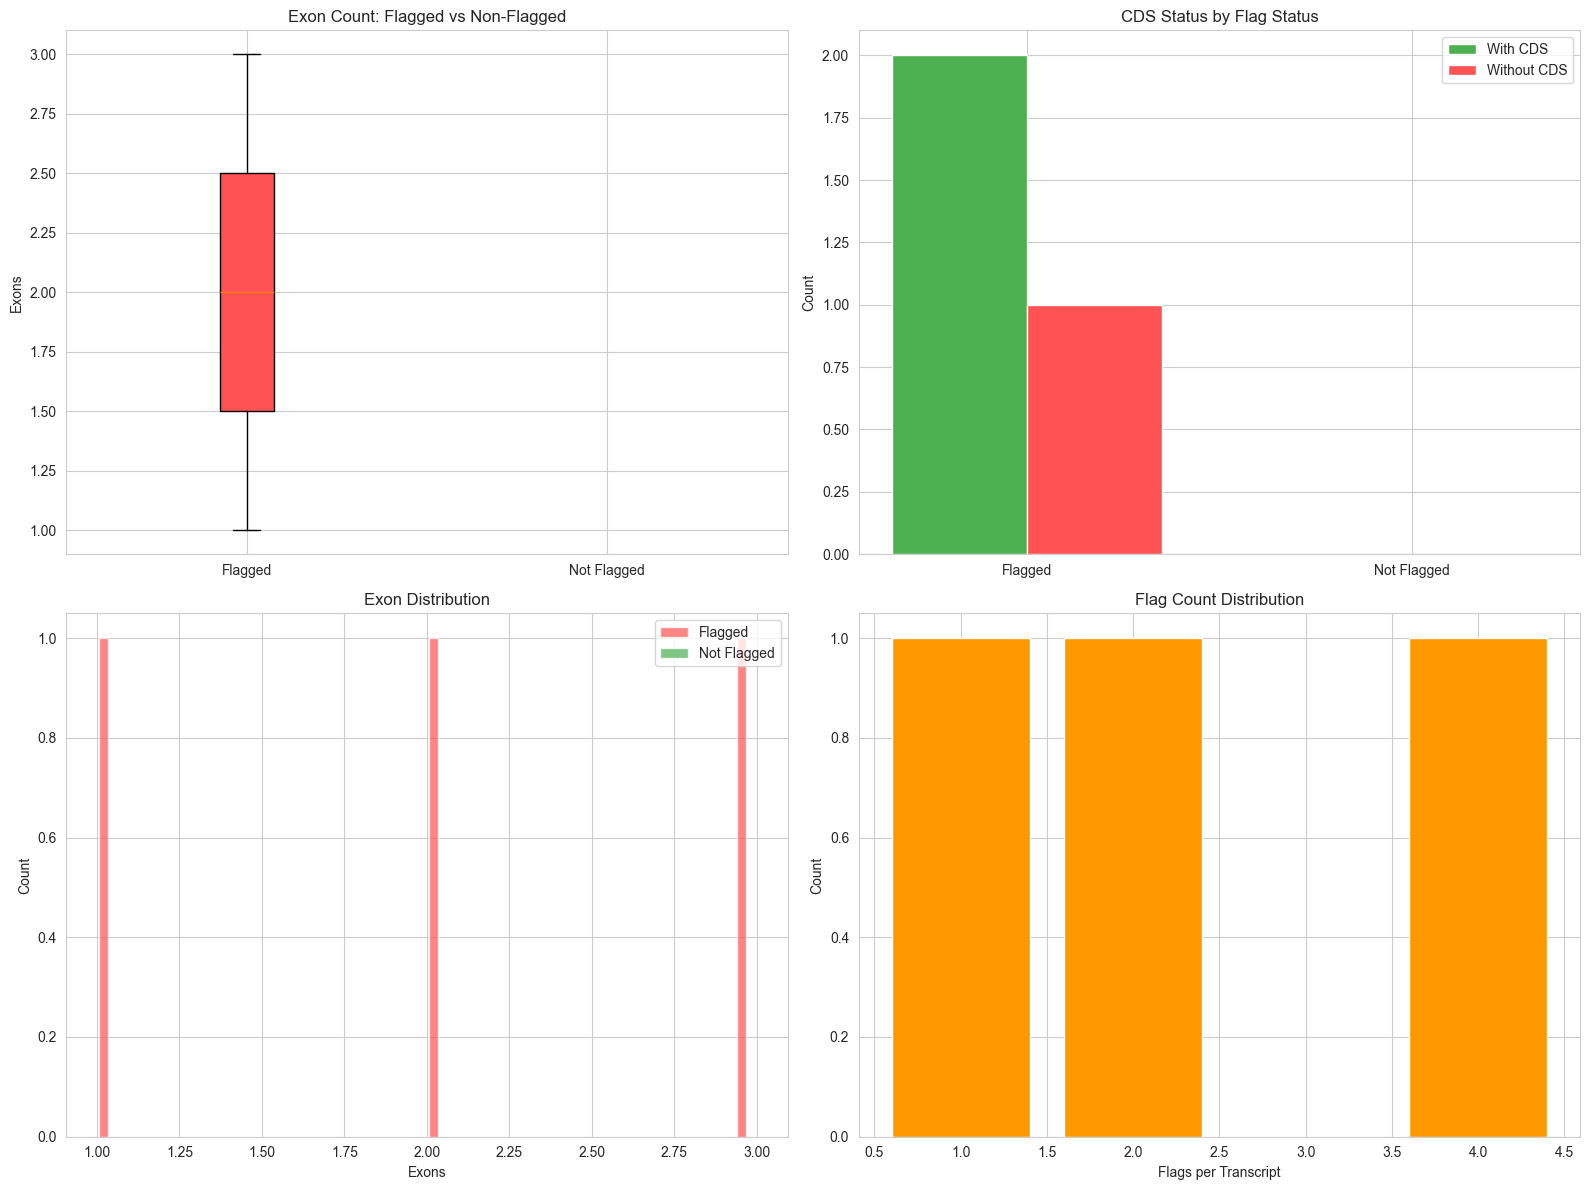


Top 20 Flagged Transcripts:


,gene_id,transcript_id,n_exons,has_cds,n_flags,flags
0,PF3D7_1314600,PF3D7_1314600.1,1,True,4,"cds_phase_inconsistent,missing_start_codon,mis..."
1,gene1,tx1,3,True,2,"cds_phase_inconsistent,missing_stop_codon"
2,gene1,tx2,2,False,1,no_cds



Gene Model QC Summary Report

Input: /data/models.gff3
Date: 2026-01-27T23:03:28.375841
Version: 0.1.0

Overview:
  Total Transcripts: 3
  Unique Genes: 2
  Flagged: 3 (100.0%)
  With CDS: 2 (66.7%)

Exon Statistics:
  Mean: 2.00
  Median: 2
  Range: 1 - 3

QC Flags:
  cds_phase_inconsistent              2 ( 66.7%)
  missing_stop_codon                  2 ( 66.7%)
  missing_start_codon                 1 ( 33.3%)
  single_exon                         1 ( 33.3%)
  no_cds                              1 ( 33.3%)



✓ Report saved to: /Users/macbookpro2020/Sites/GroupF_GFFParser/results/analysis_summary.txt
✓ Analysis complete!


In [5]:
# ============================================================================
# COMPLETE JUPYTER NOTEBOOK CODE
# Save this file, then convert to .ipynb or copy cells into Jupyter
# To convert: jupyter nbconvert --to notebook explore_results_complete.py
# ============================================================================

# %% [markdown]
# # Gene Model Summariser - Results Exploration
# 
# This notebook provides comprehensive analysis and visualization of QC results from gene-summariser.

# %% Cell 1: Setup and Path Detection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import os

print("Gene Model Summariser - Results Explorer")
print("=" * 70)

def find_results_dir():
    """Automatically find the results directory."""
    # Try current directory
    if Path('results/transcript_summary.tsv').exists():
        return Path('results')
    
    # Try parent directories
    for i in range(4):
        check_path = Path('../' * i + 'results')
        if (check_path / 'transcript_summary.tsv').exists():
            return check_path.resolve()
    
    # Search common locations
    home = Path.home()
    for location in ['', 'Desktop', 'Documents', 'Downloads']:
        for project in ['gene-summariser-group-f', 'gene-summariser']:
            check = home / location / project / 'results'
            if (check / 'transcript_summary.tsv').exists():
                return check
    
    raise FileNotFoundError(
        f"Results not found!\n"
        f"Current dir: {Path.cwd()}\n"
        f"Fix: os.chdir('/path/to/project') or results_dir = Path('/path/to/results')"
    )

results_dir = find_results_dir()
print(f"✓ Found results: {results_dir.absolute()}\n")

# Verify files
for file in ['transcript_summary.tsv', 'run.json']:
    if not (results_dir / file).exists():
        raise FileNotFoundError(f"Missing: {file}")
    print(f"  ✓ {file}")

print("=" * 70)

# Set plot style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# %% Cell 2: Load Data
print("\n📊 Loading data...")

df = pd.read_csv(results_dir / "transcript_summary.tsv", sep="\t")
with open(results_dir / "run.json") as f:
    prov = json.load(f)

df['is_flagged'] = df['flags'] != ''
df['n_flags'] = df['flags'].apply(lambda x: len(x.split(',')) if x else 0)

print(f"✓ Loaded {len(df):,} transcripts")
print(f"✓ From: {prov['inputs']['gff3_file']}")
print(f"✓ Date: {prov['timestamp']}\n")

# %% Cell 3: Data Preview
print("=" * 70)
print("DATA PREVIEW")
print("=" * 70)
display(df.head(10))
print("\n", df.dtypes)
print("\n", df.describe())

# %% Cell 4: Summary Statistics
print("\n" + "=" * 70)
print("SUMMARY STATISTICS")
print("=" * 70)

stats = {
    'Total Transcripts': len(df),
    'Unique Genes': df['gene_id'].nunique(),
    'Flagged': df['is_flagged'].sum(),
    'With CDS': df['has_cds'].sum(),
    'Without CDS': (~df['has_cds']).sum(),
}

for key, val in stats.items():
    pct = val / stats['Total Transcripts'] * 100 if stats['Total Transcripts'] else 0
    print(f"{key:<25} {val:>10,} ({pct:>5.1f}%)")

print(f"\nExon Statistics:")
print(f"  Mean:   {df['n_exons'].mean():.2f}")
print(f"  Median: {df['n_exons'].median():.0f}")
print(f"  Range:  {df['n_exons'].min()} - {df['n_exons'].max()}")

# %% Cell 5: Exon Distribution
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram
axes[0, 0].hist(df['n_exons'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['n_exons'].mean(), color='red', linestyle='--', label='Mean')
axes[0, 0].axvline(df['n_exons'].median(), color='green', linestyle='--', label='Median')
axes[0, 0].set_xlabel("Number of Exons")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_title("Exon Count Distribution")
axes[0, 0].legend()

# Box plot
axes[0, 1].boxplot(df['n_exons'], vert=True)
axes[0, 1].set_ylabel("Number of Exons")
axes[0, 1].set_title("Exon Count Box Plot")

# CDF
sorted_exons = sorted(df['n_exons'])
cdf = [i/len(sorted_exons) for i in range(1, len(sorted_exons)+1)]
axes[1, 0].plot(sorted_exons, cdf, linewidth=2)
axes[1, 0].set_xlabel("Number of Exons")
axes[1, 0].set_ylabel("Cumulative Probability")
axes[1, 0].set_title("Cumulative Distribution")
axes[1, 0].grid(True, alpha=0.3)

# Value counts
value_counts = df['n_exons'].value_counts().head(20).sort_index()
axes[1, 1].bar(value_counts.index, value_counts.values)
axes[1, 1].set_xlabel("Number of Exons")
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_title("Top 20 Exon Counts")

plt.tight_layout()
plt.show()

# %% Cell 6: CDS Analysis
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

cds_counts = df['has_cds'].value_counts()
colors = ['#4CAF50', '#FF5252']

# Pie chart
axes[0].pie(cds_counts.values, labels=['With CDS', 'Without CDS'], 
           autopct='%1.1f%%', colors=colors)
axes[0].set_title("CDS Presence")

# Bar chart
axes[1].bar(['With CDS', 'Without CDS'], cds_counts.values, color=colors)
axes[1].set_ylabel("Count")
axes[1].set_title("CDS Status")
for i, v in enumerate(cds_counts.values):
    axes[1].text(i, v, f'{v:,}', ha='center', va='bottom')

# Exon distribution by CDS
axes[2].hist([df[df['has_cds']]['n_exons'], df[~df['has_cds']]['n_exons']], 
            bins=30, label=['With CDS', 'Without CDS'], color=colors, alpha=0.7)
axes[2].set_xlabel("Number of Exons")
axes[2].set_ylabel("Count")
axes[2].set_title("Exons by CDS Status")
axes[2].legend()

plt.tight_layout()
plt.show()

# %% Cell 7: QC Flags Analysis
flag_counts = {}
for flags_str in df['flags']:
    if flags_str:
        for flag in flags_str.split(","):
            flag_counts[flag.strip()] = flag_counts.get(flag.strip(), 0) + 1

if flag_counts:
    sorted_flags = sorted(flag_counts.items(), key=lambda x: x[1], reverse=True)
    
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # Bar chart
    flags, counts = zip(*sorted_flags)
    critical = ['no_exons', 'overlapping_exons', 'cds_phase_inconsistent', 'cds_not_divisible_by_3']
    colors_list = ['#D32F2F' if f in critical else '#FF5252' for f in flags]
    
    axes[0].bar(range(len(flags)), counts, color=colors_list, edgecolor='black')
    axes[0].set_xticks(range(len(flags)))
    axes[0].set_xticklabels(flags, rotation=45, ha='right')
    axes[0].set_ylabel("Count")
    axes[0].set_title("QC Flag Distribution (Dark Red = Critical)")
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Add counts
    for i, c in enumerate(counts):
        axes[0].text(i, c, f'{c:,}', ha='center', va='bottom')
    
    # Percentage chart
    pcts = [(count/len(df))*100 for count in counts]
    axes[1].barh(range(len(flags)), pcts, color=colors_list, edgecolor='black')
    axes[1].set_yticks(range(len(flags)))
    axes[1].set_yticklabels(flags)
    axes[1].set_xlabel("Percentage of Transcripts")
    axes[1].set_title("QC Flags as Percentage")
    axes[1].grid(True, alpha=0.3, axis='x')
    
    for i, p in enumerate(pcts):
        axes[1].text(p, i, f'{p:.1f}%', va='center')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print("\nQC Flag Summary:")
    print(f"{'Flag':<35} {'Count':>10} {'%':>8} {'Severity'}")
    print("-" * 70)
    for flag, count in sorted_flags:
        pct = count/len(df)*100
        sev = "🔴 CRITICAL" if flag in critical else "⚠️  Warning"
        print(f"{flag:<35} {count:>10,} {pct:>7.1f}% {sev}")
else:
    print("✓ No QC flags - all transcripts passed!")

# %% Cell 8: Flagged vs Non-Flagged
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Box plot comparison
flagged_data = [df[df['is_flagged']]['n_exons'], df[~df['is_flagged']]['n_exons']]
bp = axes[0, 0].boxplot(flagged_data, labels=['Flagged', 'Not Flagged'], patch_artist=True)
bp['boxes'][0].set_facecolor('#FF5252')
bp['boxes'][1].set_facecolor('#4CAF50')
axes[0, 0].set_ylabel("Exons")
axes[0, 0].set_title("Exon Count: Flagged vs Non-Flagged")

# CDS comparison
flagged_cds = df[df['is_flagged']]['has_cds'].sum()
flagged_no_cds = (~df[df['is_flagged']]['has_cds']).sum()
not_flagged_cds = df[~df['is_flagged']]['has_cds'].sum()
not_flagged_no_cds = (~df[~df['is_flagged']]['has_cds']).sum()

x = [0, 1]
width = 0.35
axes[0, 1].bar([i-width/2 for i in x], [flagged_cds, not_flagged_cds], 
              width, label='With CDS', color='#4CAF50')
axes[0, 1].bar([i+width/2 for i in x], [flagged_no_cds, not_flagged_no_cds], 
              width, label='Without CDS', color='#FF5252')
axes[0, 1].set_xticks(x)
axes[0, 1].set_xticklabels(['Flagged', 'Not Flagged'])
axes[0, 1].set_ylabel("Count")
axes[0, 1].set_title("CDS Status by Flag Status")
axes[0, 1].legend()

# Histogram
axes[1, 0].hist(flagged_data, bins=30, label=['Flagged', 'Not Flagged'],
               color=['#FF5252', '#4CAF50'], alpha=0.7)
axes[1, 0].set_xlabel("Exons")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_title("Exon Distribution")
axes[1, 0].legend()

# Flags per transcript
if df['is_flagged'].any():
    flag_dist = df[df['is_flagged']]['n_flags'].value_counts().sort_index()
    axes[1, 1].bar(flag_dist.index, flag_dist.values, color='#FF9800')
    axes[1, 1].set_xlabel("Flags per Transcript")
    axes[1, 1].set_ylabel("Count")
    axes[1, 1].set_title("Flag Count Distribution")

plt.tight_layout()
plt.show()

# %% Cell 9: Top Flagged Transcripts
if df['is_flagged'].any():
    print("\nTop 20 Flagged Transcripts:")
    top = df[df['is_flagged']].nlargest(20, 'n_flags')[
        ['gene_id', 'transcript_id', 'n_exons', 'has_cds', 'n_flags', 'flags']
    ]
    display(top)

# %% Cell 10: Generate Summary Report
report = f"""
Gene Model QC Summary Report
{'=' * 70}

Input: {prov['inputs']['gff3_file']}
Date: {prov['timestamp']}
Version: {prov['version']}

Overview:
  Total Transcripts: {len(df):,}
  Unique Genes: {df['gene_id'].nunique():,}
  Flagged: {df['is_flagged'].sum():,} ({df['is_flagged'].sum()/len(df)*100:.1f}%)
  With CDS: {df['has_cds'].sum():,} ({df['has_cds'].sum()/len(df)*100:.1f}%)

Exon Statistics:
  Mean: {df['n_exons'].mean():.2f}
  Median: {df['n_exons'].median():.0f}
  Range: {df['n_exons'].min()} - {df['n_exons'].max()}
"""

if flag_counts:
    report += "\nQC Flags:\n"
    for flag, count in sorted(flag_counts.items(), key=lambda x: x[1], reverse=True):
        report += f"  {flag:<30} {count:>6,} ({count/len(df)*100:>5.1f}%)\n"

report += f"\n{'=' * 70}\n"

print(report)

# Save report
with open(results_dir / "analysis_summary.txt", 'w') as f:
    f.write(report)

print(f"\n✓ Report saved to: {results_dir / 'analysis_summary.txt'}")
print("✓ Analysis complete!")